In [1]:
import numpy as np
import h5py
import os
import matplotlib.pyplot as plt
import deep_nn

## Managing Data

In [2]:
def load_data():
    path = os.path.join(os.getcwd(), 'datasets', 'train_catvnoncat.h5')
    training_data = h5py.File(path, 'r')

    path = os.path.join(os.getcwd(), 'datasets', 'test_catvnoncat.h5')
    testing_data = h5py.File(path, 'r')
    
    
    train_x_orig = np.array(training_data['train_set_x'][:])
    train_y = np.array(training_data['train_set_y'][:])

    test_x_orig = np.array(testing_data['test_set_x'][:])
    test_y = np.array(testing_data['test_set_y'][:])

    classes = np.array(testing_data['list_classes'][:])

    return train_x_orig, train_y, test_x_orig, test_y, classes



In [3]:
train_x_orig, train_y, test_x_orig, test_y , classes = load_data()

In [4]:
train_y = np.expand_dims(train_y, axis=0)
test_y = np.expand_dims(test_y, axis=0)

train_x = train_x_orig.reshape(train_x_orig.shape[0], -1).T / 255.
test_x = test_x_orig.reshape(test_x_orig.shape[0], -1).T / 255.


# Sample Example

In [5]:
np.squeeze(train_y[:,200])

array(1, dtype=int64)

In [6]:
def plot_sample(index = 5):
    plt.imshow(train_x_orig[index])
    plt.title("Sample Image")
    y = np.squeeze(train_y[:,index])
    print(f"Image {index} : {classes[y].decode('utf-8')},\n where y = {y}")


Image 200 : cat,
 where y = 1


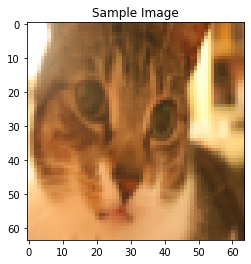

In [7]:
plot_sample(200)

## 2 Layer NN

In [8]:
def two_layer_model(X, Y, n_h,  learning_rate=0.0075, num_iterations=3000, print_cost=False):
    np.random.seed(1)
    grads = {}
    costs = []
    n_x, m = X.shape
    n_y = Y.shape[0]

    W1 = np.random.randn(n_h, n_x) * 0.01
    b1 = np.zeros((n_h, 1))
    W2 = np.random.randn(n_y, n_h) * 0.01
    b2 = np.zeros((n_y, 1))

    parameters = {"W1": W1, "b1": b1, "W2": W2, 'b2': b2}

    for i in range(num_iterations):
        # Forward Propagation
        a1, cache1 = deep_nn.linear_activation_forward(
            X, W1, b1, activation='relu')
        a2, cache2 = deep_nn.linear_activation_forward(
            a1, W2, b2, activation='sigmoid')

        # cost
        cost = deep_nn.cost(a2, Y)
        costs.append(cost)

        # Backward Propagation
        dA2 = -np.divide(Y,a2) + np.divide(1-Y, 1-a2)
        dA1, dW2, db2 = deep_nn.linear_activation_backward(
            dA2, cache2, activation='sigmoid')
        dA0, dW1, db1 = deep_nn.linear_activation_backward(
            dA1, cache1, activation='relu')

        # Grads
        grads['dW2'] = dW2
        grads['db2'] = db2
        grads['dW1'] = dW1
        grads['db1'] = db1

        # Update parameter
        parameters = deep_nn.update_parameters(
            parameters, grads, learning_rate)
        W1 = parameters['W1']
        b1 = parameters['b1']
        W2 = parameters['W2']
        b2 = parameters['b2']

        if print_cost:
            if i % 100 == 0:
                costs.append(cost)
                print(f"Cost after iteration {i}: {cost}")

    plt.plot(costs)
    plt.title(f"Learning Rate = {learning_rate}")
    plt.ylabel("Cost")
    plt.xlabel("Number of Iteartion")
    plt.show()


    return parameters

Cost after iteration 0: 0.693049735659989
Cost after iteration 100: 0.6464320953428849
Cost after iteration 200: 0.6325140647912677
Cost after iteration 300: 0.6015024920354665
Cost after iteration 400: 0.5601966311605747
Cost after iteration 500: 0.5158304772764731
Cost after iteration 600: 0.4754901313943325
Cost after iteration 700: 0.43391631512257517
Cost after iteration 800: 0.400797753620389
Cost after iteration 900: 0.35807050113237937
Cost after iteration 1000: 0.3394281538366411
Cost after iteration 1100: 0.3052753636196268
Cost after iteration 1200: 0.27491377282130275
Cost after iteration 1300: 0.24681768210614793
Cost after iteration 1400: 0.19850735037466122
Cost after iteration 1500: 0.17448318112556363
Cost after iteration 1600: 0.1708076297809549
Cost after iteration 1700: 0.11306524562164766
Cost after iteration 1800: 0.09629426845937145
Cost after iteration 1900: 0.08342617959726881
Cost after iteration 2000: 0.0743907870431909
Cost after iteration 2100: 0.0663074813

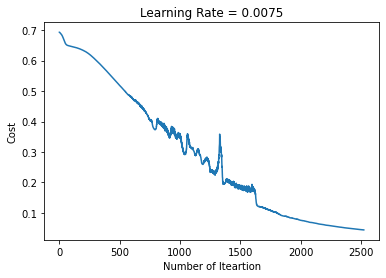

In [9]:
parameters = two_layer_model(train_x, train_y, 7, num_iterations = 2500, print_cost=True)

In [10]:
predictions_train = deep_nn.predict(train_x, train_y, parameters)

Accuracy (1st method) = 100.0
Accuracy (2nd method) =100.0 


In [11]:
predictions_test = deep_nn.predict(test_x, test_y, parameters)

Accuracy (1st method) = 72.0
Accuracy (2nd method) =72.0 


# L Layer Model

In [16]:
def  l_layer_model(X, Y , layer_dims, learning_rate = 0.0075, num_iterations = 3000, print_cost = True):
    np.random.seed(1)
    costs = []
    

    parameters = deep_nn.initialize_parameters_deep(layer_dims)

    for i in range(num_iterations):
        al, caches = deep_nn.L_model_forward(X, parameters)

        cost = deep_nn.cost(al, Y)

        grads = deep_nn.L_model_backward(al, Y , caches)

        parameters = deep_nn.update_parameters(parameters, grads, learning_rate)


        if print_cost:
            if i % 100 == 0:
                costs.append(cost)
                print(f"Cost after iteration {i} : {cost}")

    plt.plot(costs)
    plt.title(f"Learning Rate : {learning_rate}")
    plt.xlabel("Number of Iteration")
    plt.ylabel("Costs")
    plt.show()

    return parameters

Cost after iteration 0 : 0.7157315134137129
Cost after iteration 100 : 0.6747377593469114
Cost after iteration 200 : 0.6603365433622126
Cost after iteration 300 : 0.6462887802148751
Cost after iteration 400 : 0.6298131216927774
Cost after iteration 500 : 0.606005622926534
Cost after iteration 600 : 0.5690041263975135
Cost after iteration 700 : 0.519796535043806
Cost after iteration 800 : 0.4641571678628231
Cost after iteration 900 : 0.4084203004829893
Cost after iteration 1000 : 0.37315499216069037
Cost after iteration 1100 : 0.30572374573047134
Cost after iteration 1200 : 0.2681015284774086
Cost after iteration 1300 : 0.23872474827672555
Cost after iteration 1400 : 0.20632263257914701
Cost after iteration 1500 : 0.17943886927493488
Cost after iteration 1600 : 0.15798735818800894
Cost after iteration 1700 : 0.1424041301227351
Cost after iteration 1800 : 0.12865165997883626
Cost after iteration 1900 : 0.11244314998148541
Cost after iteration 2000 : 0.08505631034954358
Cost after iterati

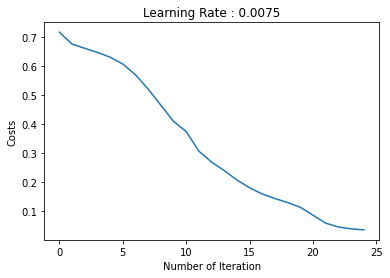

In [17]:
layers_dims = [12288, 20, 7, 5, 1] #  4-layer model
l_layer_parameters = l_layer_model(train_x, train_y, layers_dims, num_iterations=2500, print_cost = True)

In [18]:
predictions_train = deep_nn.predict(train_x, train_y, l_layer_parameters)

Accuracy (1st method) = 99.52153110047847
Accuracy (2nd method) =99.52153110047847 


In [19]:
predictions_test = deep_nn.predict(test_x, test_y, l_layer_parameters)

Accuracy (1st method) = 78.0
Accuracy (2nd method) =78.0 
